<a href="https://colab.research.google.com/github/ralbu85/STML/blob/main/ch11_PCA_iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
from sklearn.datasets import load_iris
iris = load_iris(as_frame=True)
df = iris['data']


In [4]:
target = iris['target']

## Data Normalization

In [12]:
m = df.mean()
s = df.std()
df_norm = (df-m)/s

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,-0.897674,1.015602,-1.335752,-1.311052
1,-1.139200,-0.131539,-1.335752,-1.311052
2,-1.380727,0.327318,-1.392399,-1.311052
3,-1.501490,0.097889,-1.279104,-1.311052
4,-1.018437,1.245030,-1.335752,-1.311052
...,...,...,...,...
145,1.034539,-0.131539,0.816859,1.443994
146,0.551486,-1.278680,0.703564,0.919223
147,0.793012,-0.131539,0.816859,1.050416
148,0.430722,0.786174,0.930154,1.443994


## Perform PCA

In [13]:
from sklearn.decomposition import PCA

pca = PCA() # make pca class
pca.fit(df_norm) # fit the data

PCA()

In [14]:
# eigenvector
pca.components_

array([[ 0.52106591, -0.26934744,  0.5804131 ,  0.56485654],
       [ 0.37741762,  0.92329566,  0.02449161,  0.06694199],
       [-0.71956635,  0.24438178,  0.14212637,  0.63427274],
       [-0.26128628,  0.12350962,  0.80144925, -0.52359713]])

In [15]:
# eigenvalue
pca.explained_variance_

array([2.91849782, 0.91403047, 0.14675688, 0.02071484])

In [16]:
pca.explained_variance_ratio_

array([0.72962445, 0.22850762, 0.03668922, 0.00517871])

In [18]:
# Projection onto pca space
Z = pca.transform(df_norm) # result in new datasets projected onto PCA space

## Visualization

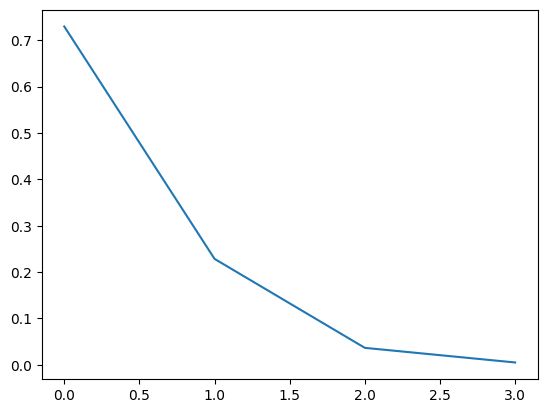

In [19]:
import matplotlib.pyplot as plt

plt.plot(pca.explained_variance_ratio_)

In [21]:
pca.explained_variance_ratio_.cumsum() # cumulative sum

array([0.72962445, 0.95813207, 0.99482129, 1.        ])

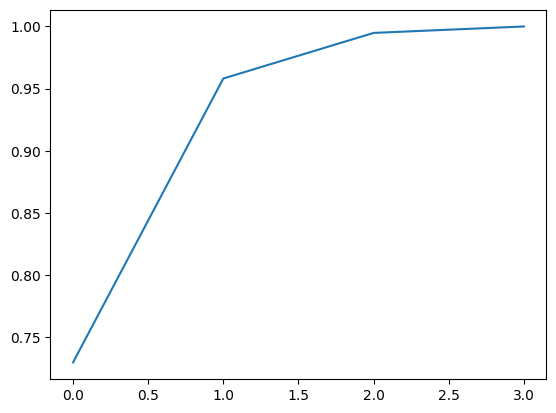

In [20]:
## cumulative variacne explained ratio plot
plt.plot(pca.explained_variance_ratio_.cumsum())

## Visualize the PCA space

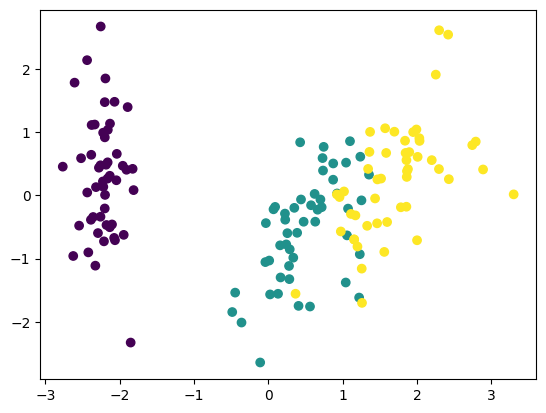

In [26]:
z1 = Z[:,0] # first column -> projected to the first principal component
z2 = Z[:,1] # second column -> projected to the second principal component
plt.scatter(z1, z2, c=target)

In [29]:
factor

array([[ 0.52106591, -0.26934744,  0.5804131 ,  0.56485654],
       [ 0.37741762,  0.92329566,  0.02449161,  0.06694199],
       [-0.71956635,  0.24438178,  0.14212637,  0.63427274],
       [-0.26128628,  0.12350962,  0.80144925, -0.52359713]])

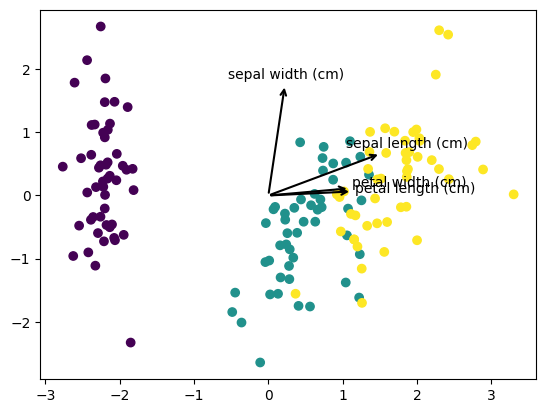

In [31]:
    factor = pca.components_[:2,:] # factor loadin vectors
    # plt.figure(figsize=(12,8))
    plt.scatter(z1,z2,c=target)
    for i in range(4):
        plt.annotate(df.columns[i],xy=(0,0),xytext=(factor[:,i]*2),arrowprops={'lw':1.5, 'arrowstyle':'<-'})